In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogLocator

# Plots

In [5]:
def calculate_error(values):
    return np.array([np.median(values) - np.percentile(values, 25), np.percentile(values, 75) - np.median(values)])

In [6]:
def generate_plot_distance(data_approx, save, fig_name):
    distanceCBA = [np.median(data_approx[f'data_{2*i}qubits']['distanceCBA']) for i in range(1, 5)]
    distanceDykstraCBA = [np.median(data_approx[f'data_{2*i}qubits']['distanceDykstraCBA']) for i in range(1, 5)]
    distanceHIP = [np.median(data_approx[f'data_{2*i}qubits']['distanceHIP']) for i in range(1, 5)]
    distanceTSS = [np.median(data_approx[f'data_{2*i}qubits']['distanceTSS']) for i in range(1, 5)]
    distanceDykstraId = [np.median(data_approx[f'data_{2*i}qubits']['distanceDykstraId']) for i in range(1, 5)]

    errors_CBA = [calculate_error(data_approx[f'data_{2*i}qubits']['distanceCBA']) for i in range(1, 5)]
    errors_DykstraCBA = [calculate_error(data_approx[f'data_{2*i}qubits']['distanceDykstraCBA']) for i in range(1, 5)]
    errors_HIP = [calculate_error(data_approx[f'data_{2*i}qubits']['distanceHIP']) for i in range(1, 5)]
    errors_TSS = [calculate_error(data_approx[f'data_{2*i}qubits']['distanceTSS']) for i in range(1, 5)]
    errors_DykstraId = [calculate_error(data_approx[f'data_{2*i}qubits']['distanceDykstraId']) for i in range(1, 5)]

    x_axis = [*range(1,5)]

    # Plot with error bars
    plt.errorbar(x_axis, distanceCBA, yerr=np.array(errors_CBA).T, color='black', marker='^', ls='--', label="CBA", capsize = 5)
    plt.errorbar(x_axis, distanceTSS, yerr=np.array(errors_TSS).T, color='grey', marker='.', ls='-', label="TSS", capsize = 5)
    plt.errorbar(x_axis, distanceHIP, yerr=np.array(errors_HIP).T, color='red', marker='x', ls='-', label="HIP", capsize = 5)
    plt.errorbar(x_axis, distanceDykstraCBA, yerr=np.array(errors_DykstraCBA).T, color='blue', marker='P', ls='--', label="Dykstra + CBA", capsize = 5)
    plt.errorbar(x_axis, distanceDykstraId, yerr=np.array(errors_DykstraId).T, color='green', marker='s', ls='-', label="Dykstra + Id", capsize = 5)

    plt.ylabel(r"$||J^* - J^*_{SDP}||_F$", fontsize='large')
    plt.ylim(1e-5, 1e0)
    plt.yscale("log")
    plt.legend(fontsize='medium')
    plt.xlabel("qubits", fontsize='large')
    plt.xticks(x_axis, fontsize='large')
    plt.tick_params(axis='both', labelsize='large')
    plt.gca().yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(0.1, 1, 0.1)))
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)

    if save == True:
        plt.savefig(fig_name, dpi=400)
    plt.show()


In [7]:
def generate_plot_time(data_approx, data_sdp, save, fig_name):
    # Your existing data
    timeCBA = [np.median(data_approx[f'data_{2*i}qubits']['timeCBA']) for i in range(1, 5)]
    timeDykstraCBA = [np.median(data_approx[f'data_{2*i}qubits']['timeDykstraCBA']) for i in range(1, 5)]
    timeHIP = [np.median(data_approx[f'data_{2*i}qubits']['timeHIP']) for i in range(1, 5)]
    timeTSS = [np.median(data_approx[f'data_{2*i}qubits']['timeTSS']) for i in range(1, 5)]
    timeDykstraId = [np.median(data_approx[f'data_{2*i}qubits']['timeDykstraId']) for i in range(1, 5)]
    timeSDP = [np.median(data_sdp[f'data_{2*i}qubits']['timeSDP']) for i in range(1, 5)]

    x_axis = [*range(1,5)]

    # Calculate error bars
    def calculate_error(values):
        return np.array([np.median(values) - np.percentile(values, 25), np.percentile(values, 75) - np.median(values)])

    errors_CBA = [calculate_error(data_approx[f'data_{2*i}qubits']['timeCBA']) for i in range(1, 5)]
    errors_DykstraCBA = [calculate_error(data_approx[f'data_{2*i}qubits']['timeDykstraCBA']) for i in range(1, 5)]
    errors_HIP = [calculate_error(data_approx[f'data_{2*i}qubits']['timeHIP']) for i in range(1, 5)]
    errors_TSS = [calculate_error(data_approx[f'data_{2*i}qubits']['timeTSS']) for i in range(1, 5)]
    errors_DykstraId = [calculate_error(data_approx[f'data_{2*i}qubits']['timeDykstraId']) for i in range(1, 5)]
    errors_SDP = [calculate_error(data_sdp[f'data_{2*i}qubits']['timeSDP']) for i in range(1, 5)]

    # Plot with error bars
    plt.errorbar(x_axis, timeCBA, yerr=np.array(errors_CBA).T, color='black', marker='^', ls='--', label="CBA", capsize = 5)
    plt.errorbar(x_axis, timeTSS, yerr=np.array(errors_TSS).T, color='grey', marker='.', ls='-', label="TSS", capsize = 5)
    plt.errorbar(x_axis, timeHIP, yerr=np.array(errors_HIP).T, color='red', marker='x', ls='-', label="HIP", capsize = 5)
    plt.errorbar(x_axis, timeDykstraCBA, yerr=np.array(errors_DykstraCBA).T, color='blue', marker='P', ls='--', label="Dykstra + CBA", capsize = 5)
    plt.errorbar(x_axis, timeDykstraId, yerr=np.array(errors_DykstraId).T, color='green', marker='s', ls='-', label="Dykstra + Id", capsize = 5)
    plt.errorbar(x_axis, timeSDP, yerr=np.array(errors_SDP).T, color='orange', marker='*', ls='-', label="Exact", capsize = 5)

    plt.yscale("log")
    plt.ylim(1e-4, 1e3)
    plt.legend(loc="upper left", fontsize='medium')
    plt.ylabel("Run time", fontsize='large')
    plt.xlabel("Qubits", fontsize='large')
    plt.xticks(x_axis, fontsize='large')
    plt.tick_params(axis='both', labelsize='large')
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)

    if save == True:
        plt.savefig(fig_name, dpi=400)
    plt.show()


## Plots for p = 0.1

In [9]:
import pickle
import os

# Load dictionary from file
with open('data/dataChoiCholesky_p1e1.pkl', 'rb') as pickle_file:
    data_approx = pickle.load(pickle_file)
    
# Load dictionary from file
with open('data/dataExactChoi_p1e1.pkl', 'rb') as pickle_file:
    data_sdp = pickle.load(pickle_file)

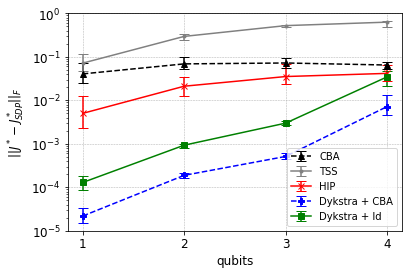

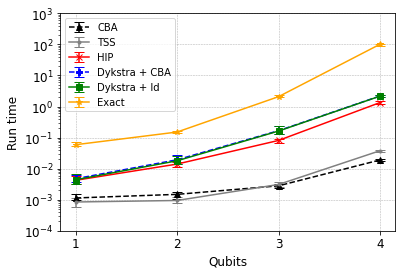

In [11]:
fig_name = None 
generate_plot_distance(data_approx, False, fig_name)
generate_plot_time(data_approx, data_sdp, False, fig_name)

## Plots for p = 0.01

In [12]:
import pickle
import os

# Load dictionary from file
with open('data/dataChoiCholesky_p1e2.pkl', 'rb') as pickle_file:
    data_approx = pickle.load(pickle_file)
    
# Load dictionary from file
with open('data/dataExactChoi_p1e2.pkl', 'rb') as pickle_file:
    data_sdp = pickle.load(pickle_file)

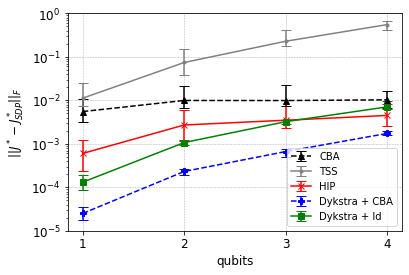

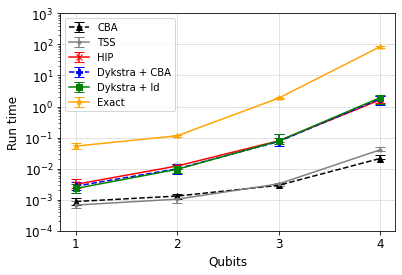

In [13]:
fig_name = None 
generate_plot_distance(data_approx, False, fig_name)
generate_plot_time(data_approx, data_sdp, False, fig_name)

## Plots for p = 0.001

In [16]:
import pickle
import os

# Load dictionary from file
with open('data/dataChoiCholesky_p1e3.pkl', 'rb') as pickle_file:
    data_approx = pickle.load(pickle_file)
    
# Load dictionary from file
with open('data/dataExactChoi_p1e3.pkl', 'rb') as pickle_file:
    data_sdp = pickle.load(pickle_file)

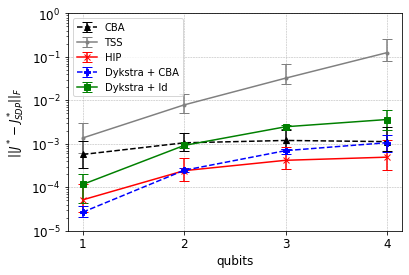

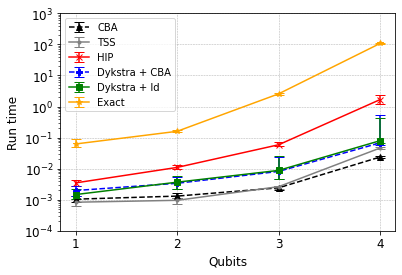

In [17]:
fig_name = None 
generate_plot_distance(data_approx, False, fig_name)
generate_plot_time(data_approx, data_sdp, False, fig_name)